In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Sets/health care diabetes.csv')
data=df
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
[np.shape(data[data['Outcome'] == 1]), np.shape(data[data['Outcome'] == 0])]

[(268, 9), (500, 9)]

In [5]:
inputs= data.drop('Outcome', axis='columns')
target= data['Outcome']

In [6]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


# Decision Trees

In [7]:
from sklearn.neighbors import KNeighborsClassifier # First step: creat model

x = inputs
y = target


In [8]:
from sklearn.model_selection import train_test_split
#x_overs, y_overs
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y,random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dtc = DecisionTreeClassifier(min_samples_split=2, max_depth=7)
dtc=dtc.fit(x_train, y_train)

predict_dtc = dtc.predict(x_test)

temp_best = dtc.score(x_test,y_test)
temp_best

0.7965367965367965


# Different max_depth

In [10]:
best_split=2

for j in range(3,15):
  for i in range(2, 50):
    dtc_temp = DecisionTreeClassifier(min_samples_split=i, max_depth=j)
    dtc_temp = dtc_temp.fit(x_train, y_train)
    if temp_best < dtc_temp.score(x_test, y_test):
      temp_best=dtc_temp.score(x_test,y_test)
      best_depth=j
      best_split=i

print("Best depth = " + str(best_depth))
print("Best split: " + str(best_split))
print("Best score = " + str(temp_best))

Best depth = 7
Best split: 26
Best score = 0.8051948051948052


In [11]:
import graphviz
from sklearn.tree import export_graphviz
import pydotplus

export_graphviz(dtc, out_file="tree.dot",filled=True, rounded=True)
with open("tree.dot") as f:
    dot_graph = f.read()

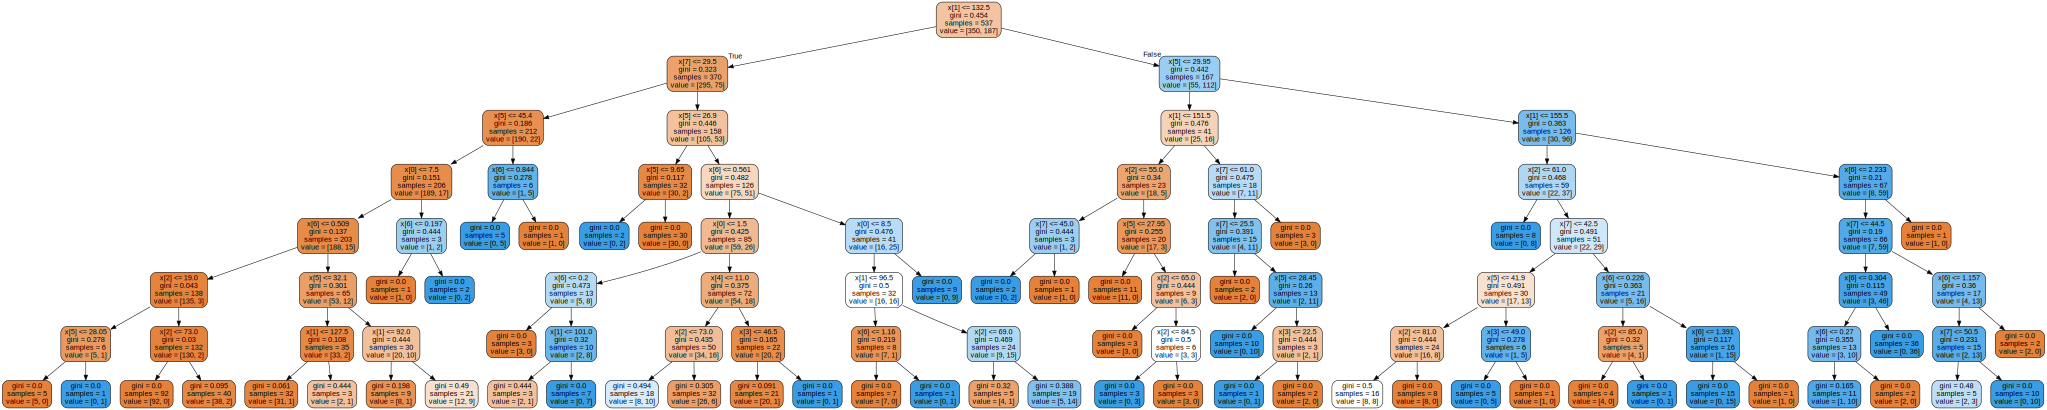

In [12]:

graphviz.Source(dot_graph)
